# Домашнее задание 1 - предсказание задержки авиарейсов


### О задании

Практическое задание посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

### Pandas

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [17]:
import pandas as pd
%matplotlib inline

data = pd.read_csv("2008.csv")
data 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**1.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [19]:
# Your code here
cancellation_counts = data['CancellationCode'].value_counts()

most_common_cancellation_reason = cancellation_counts.idxmax()
print("Самая частая причина отмены рейса:", most_common_cancellation_reason)

Самая частая причина отмены рейса: A


**2.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [28]:
# Your code here
mean_distance = data['Distance'].mean()
min_distance = data['Distance'].min()
max_distance = data['Distance'].max()

print("Среднее расстояние:", mean_distance)
print("Минимальное расстояние:", min_distance)
print("Максимальное расстояние:", max_distance)

Среднее расстояние: 724.5082571428571
Минимальное расстояние: 31
Максимальное расстояние: 4962


**3.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [45]:
# Your code here
min_distance_flights = data[data['Distance'] == min_distance]

print("Рейсы с минимальным расстоянием:")
print(min_distance_flights[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance']])

other_distances = data[data['FlightNum'].isin(min_distance_flights['FlightNum'])]
print("\nРасстояния для этих же рейсов в другие дни:")
print(other_distances[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance']].sort_values(['Distance']))

Рейсы с минимальным расстоянием:
       Year  Month  DayofMonth  DayOfWeek  FlightNum  Distance
1116   2008     12          30          2         65        31
6958   2008     12          26          5         65        31
17349  2008      8          18          1         64        31
27534  2008      3          11          2         64        31
46082  2008      8           9          6         65        31
48112  2008      2          28          4         64        31

Расстояния для этих же рейсов в другие дни:
       Year  Month  DayofMonth  DayOfWeek  FlightNum  Distance
6958   2008     12          26          5         65        31
48112  2008      2          28          4         64        31
17349  2008      8          18          1         64        31
46082  2008      8           9          6         65        31
1116   2008     12          30          2         65        31
...     ...    ...         ...        ...        ...       ...
2619   2008      5          23          

**4.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [49]:
# Your code here
airport_counts = data['Origin'].value_counts()
most_departures_airport = airport_counts.idxmax()
print("Аэропорт с наибольшим количеством вылетов:", most_departures_airport)

Аэропорт с наибольшим количеством вылетов: ATL


**5.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [51]:
# Your code here
average_airtime_by_airport = data.groupby('Origin')['AirTime'].mean()
airport_with_max_average_airtime = average_airtime_by_airport.idxmax()
print("Аэропорт с наибольшим средним временем полета:", airport_with_max_average_airtime)

Аэропорт с наибольшим средним временем полета: SJU


**6.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [53]:
# Your code here
total_flights_by_airport = data.groupby('Origin')['Year'].count()
filtered_airports = total_flights_by_airport[total_flights_by_airport >= 1000]
filtered_data = data[data['Origin'].isin(filtered_airports.index)]
delayed_flights_by_airport = filtered_data[filtered_data['DepDelay'] > 0].groupby('Origin')['Year'].count()
airport_with_highest_delay_percentage = (delayed_flights_by_airport / total_flights_by_airport).idxmax()
print("Аэропорт с наибольшей долей задержанных рейсов:", airport_with_highest_delay_percentage)

Аэропорт с наибольшей долей задержанных рейсов: EWR


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**7.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [55]:
# Your code here
import pandas as pd
%matplotlib inline

data = pd.read_csv("2008.csv")
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [61]:
missing_values = data.isnull()
have_missing_values = missing_values.any().any()
total_missing = missing_values.sum().sum()
objects_with_missing = missing_values.any(axis=1).sum()
features_with_missing = missing_values.any().sum()

print("Имеются ли в данных пропущенные значения?", have_missing_values)
print("Сколько всего пропущенных элементов в таблице 'объект-признак'?", total_missing)
print("Сколько объектов имеют хотя бы один пропуск?", objects_with_missing)
print("Сколько признаков имеют хотя бы одно пропущенное значение?", features_with_missing)

Имеются ли в данных пропущенные значения? True
Сколько всего пропущенных элементов в таблице 'объект-признак'? 355215
Сколько объектов имеют хотя бы один пропуск? 70000
Сколько признаков имеют хотя бы одно пропущенное значение? 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [63]:
# Your code here
missing_dep_delay = data['DepDelay'].isnull().any()
print("Имеются ли пропущенные значения в целевой переменной (DepDelay)?", missing_dep_delay)

Имеются ли пропущенные значения в целевой переменной (DepDelay)? True


In [69]:
data = data.dropna(subset=['DepDelay'])
data = data[data['DepDelay'] != 0]

X = data.drop(columns=['DepDelay'])
y = data['DepDelay']

data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**8.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [71]:
# Your code here
def convert_to_hour_and_minute(value):
    if pd.notna(value):
        hour = int(value // 100)
        minute = int(value % 100)
        return hour, minute
    else:
        return None, None

data['DepTime_Hour'], data['DepTime_Minute'] = zip(*data['DepTime'].map(convert_to_hour_and_minute))
data = data.drop(columns=['DepTime'])
data['CRSDepTime_Hour'], data['CRSDepTime_Minute'] = zip(*data['CRSDepTime'].map(convert_to_hour_and_minute))
data = data.drop(columns=['CRSDepTime'])
data['ArrTime_Hour'], data['ArrTime_Minute'] = zip(*data['ArrTime'].map(convert_to_hour_and_minute))
data = data.drop(columns=['ArrTime'])
data['CRSArrTime_Hour'], data['CRSArrTime_Minute'] = zip(*data['CRSArrTime'].map(convert_to_hour_and_minute))
data = data.drop(columns=['CRSArrTime'])
data1 = data.copy()

data1

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21,11,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14,26,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11,43,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11,41,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8,15,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9,20,9,25,11.0,10.0,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18,29,18,40,21.0,37.0,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11,49,11,25,13.0,36.0,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19,6,19,0,22.0,0.0,21,39


**9.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [73]:
# Your code here
import seaborn as sns

In [75]:
data1.drop(columns = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",\
                      "LateAircraftDelay", "Cancelled", \
                      "CancellationCode", "Year", "TailNum"], inplace = True)

In [83]:
from sklearn.model_selection import train_test_split

X = data1.drop(columns=['DepDelay'])
y = data1['DepDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

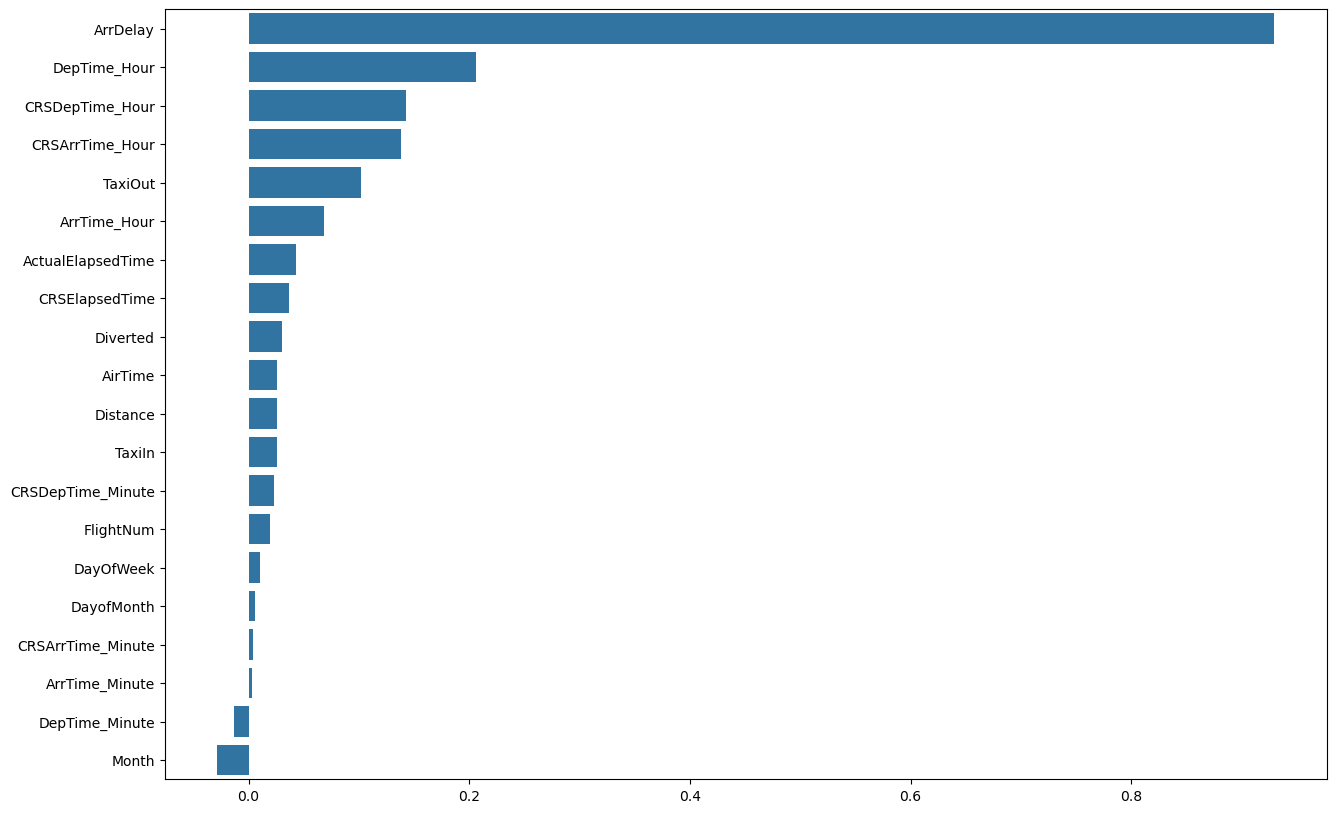

In [93]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X_train[feature], y_train)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y=features_order, x=correlations)
plot.figure.set_size_inches(15, 10)

In [95]:
data1.drop(columns = ['ArrDelay'], inplace = True)

**10.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

In [97]:
data1

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,16.0,MDW,...,8.0,0,21,11,20,55,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,16.0,IAH,...,12.0,0,14,26,14,10,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,-2.0,MDW,...,9.0,0,11,43,11,45,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,-3.0,SLC,...,19.0,0,11,41,11,44,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,-5.0,LAS,...,8.0,0,8,15,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,-5.0,CVG,...,13.0,0,9,20,9,25,11.0,10.0,11,18
69995,5,12,1,DL,794,128.0,129.0,86.0,-11.0,ORD,...,20.0,0,18,29,18,40,21.0,37.0,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,24.0,ORD,...,13.0,0,11,49,11,25,13.0,36.0,13,14
69998,2,18,1,NW,641,234.0,219.0,192.0,6.0,RSW,...,22.0,0,19,6,19,0,22.0,0.0,21,39


В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

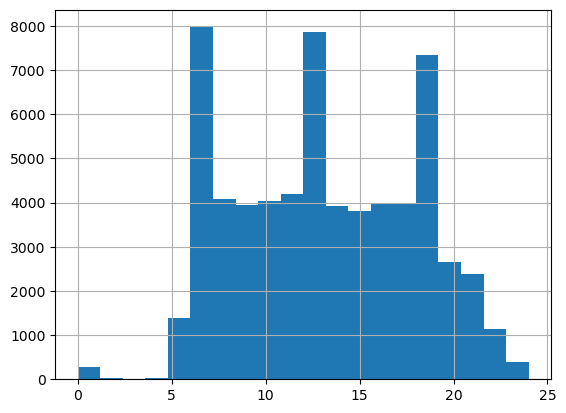

In [99]:
X['DepTime_Hour'].hist(bins=20)

<Axes: >

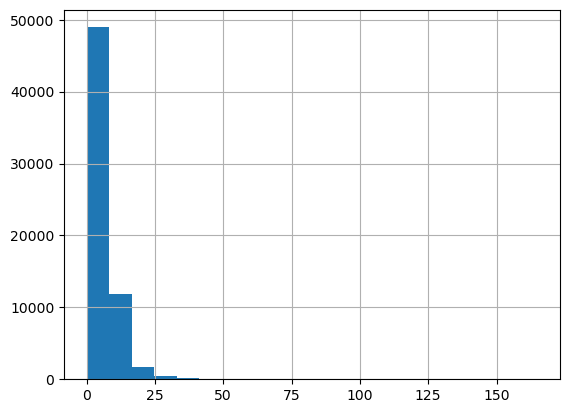

In [101]:
X['TaxiIn'].hist(bins=20)

<Axes: >

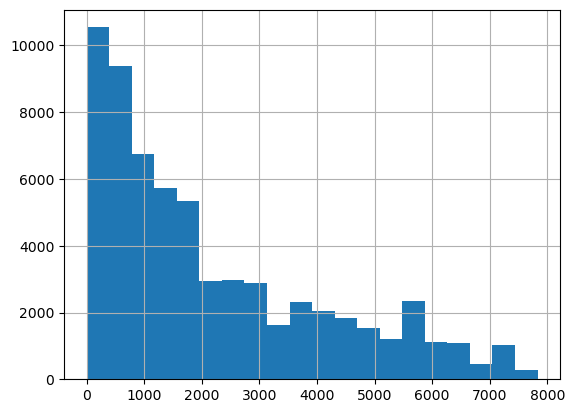

In [103]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [106]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    num_cols = data.select_dtypes(np.number).columns
    data[num_cols] = data[num_cols].fillna(0)
    scaler = StandardScaler()
    data[num_cols] = scaler.fit_transform(data[num_cols])
    
    cat_col = data.select_dtypes(object).columns
    data[cat_col] = data[cat_col].fillna('nan')
    dumms = pd.get_dummies(data[cat_col])
    result = pd.concat([data, dumms], axis = 1).drop(cat_col, axis = 1)
    return result

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [110]:
    # Your code here
data2 = transform_data(data1)
print(data2.columns.size)

634


In [112]:
# Your code here
data2

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,0.144971,-0.744130,-0.786908,...,False,False,False,False,False,False,False,False,False,False
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.144971,0.183961,-0.582387,...,False,False,False,False,False,False,False,False,False,False
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.354394,0.471018,-0.582387,...,False,False,False,False,False,False,False,False,False,False
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.382136,-0.347886,-0.582387,...,False,False,False,False,False,False,False,False,False,False
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.437621,0.634799,-0.582387,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.437621,-0.120706,1.053782,...,False,False,False,False,False,False,False,False,False,False
69995,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.604076,-0.217566,3.098994,...,False,False,False,False,False,False,False,False,False,False
69996,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,0.366910,-1.043514,-0.582387,...,False,False,False,False,False,False,False,False,False,False
69998,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,-0.132454,1.208912,2.689951,...,False,False,False,False,False,False,False,False,False,False


**11.** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [114]:
# Your code here
X = data2.drop(columns=["DepDelay"])
y = data2["DepDelay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [116]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train_train, X_train_test, y_train_train, y_train_test = \
train_test_split(X_train, y_train, train_size = 1000, random_state = 10)
linreg = LinearRegression().fit(X_train_train, y_train_train)

y_train_train_pred = linreg.predict(X_train_train)
print("MSE подвыборки (train):", mean_squared_error(y_train_train, y_train_train_pred))
print("R^2 подвыборки (train):", linreg.score(X_train_train, y_train_train))

y_test_pred = linreg.predict(X_test)
print("MSE контрольной выборки (test):", mean_squared_error(y_test, y_test_pred))
print("R^2 контрольной выборки (test):", linreg.score(X_test, y_test))

MSE подвыборки (train): 0.8654297854215592
R^2 подвыборки (train): 0.31085091801556897
MSE контрольной выборки (test): 1.2919506306556683
R^2 контрольной выборки (test): -0.28380685755805724


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [118]:
# Your code here
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV, cross_val_predict

**13.** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [120]:
# Your code here
# ...
lasso = Lasso()
lasso = lasso.fit(X_train_train, y_train_train)
ridge = Ridge()
ridge = ridge.fit(X_train_train, y_train_train)

print("0 Lasso:", np.sum(np.absolute(lasso.coef_) < 10 ** (-7)))
print("0 Ridge:", np.sum(np.absolute(ridge.coef_) < 10 ** (-7)))

0 Lasso: 633
0 Ridge: 282


In [126]:
l_zeros = []
r_zeros = []
alphas = 10 ** np.linspace(-3, 3, 20)
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    ridge = Ridge(alpha = alpha)
    lasso.fit(X_train_train, y_train_train)
    ridge.fit(X_train_train, y_train_train)
    l_zeros.append(np.sum(np.absolute(lasso.coef_) < 10 ** (-7)))
    r_zeros.append(np.sum(np.absolute(ridge.coef_) < 10 ** (-7)))

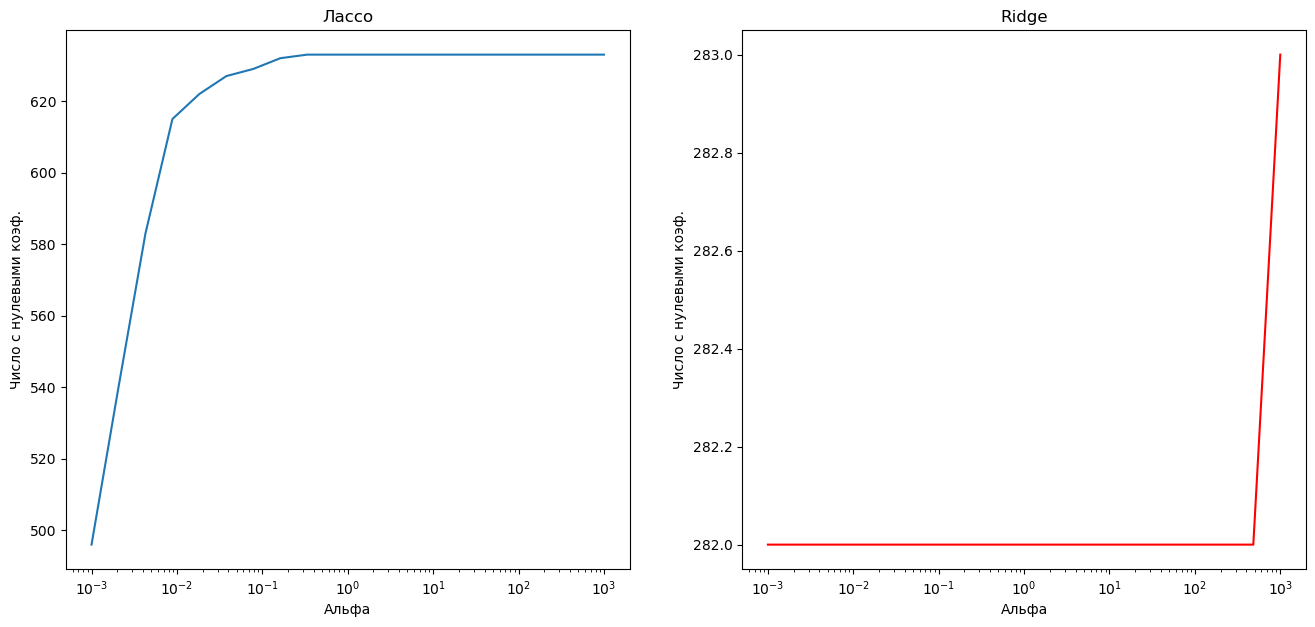

In [128]:
fig, axs = plt.subplots(1, 2, figsize = (16, 7))
axs[0].plot(alphas, l_zeros)
axs[0].set_xlabel("Альфа")
axs[0].set_ylabel("Число с нулевыми коэф.")
axs[0].set_title("Лассо")
axs[0].set_xscale('log')
axs[1].plot(alphas, r_zeros, color='red')
axs[1].set_xlabel("Альфа")
axs[1].set_ylabel("Число с нулевыми коэф.")
axs[1].set_title("Ridge")
axs[1].set_xscale('log')

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [132]:
def metrics(X_train, y_train, X_test, y_test, alpha = 1):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    y_test_pred = ridge.predict(X_test)
    print("RMSE:", mean_squared_error(y_test, y_test_pred, squared = False))
    print("MAE:", mean_absolute_error(y_test, y_test_pred))
    print("R^2:", ridge.score(X_test, y_test))
metrics(X_train_train, y_train_train, X_test, y_test)

RMSE: 1.0595861790566692
MAE: 0.6222479715869402
R^2: -0.11564581999571044


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [23]:
# Your code here
# ...
from sklearn.model_selection import GridSearchCV

def search_best_alpha(scoring, X_train_train, y_train_train):
    alphas = 10 ** np.linspace(-3, 3, 30)
    searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring = scoring, cv = 5)
    searcher.fit(X_train_train, y_train_train)
    best_alpha = searcher.best_params_["alpha"]
    
    print(f'Best a for {scoring} is, {best_alpha}')
    plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
    plt.xscale("log")
    plt.xlabel("alpha")
    plt.ylabel("CV score")
    plt.title(scoring)
    return best_alpha

Best a for neg_root_mean_squared_error is, 621.0169418915616
RMSE: 0.9897652063589439
MAE: 0.5630789087256522
R^2: 0.02653993794724896


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


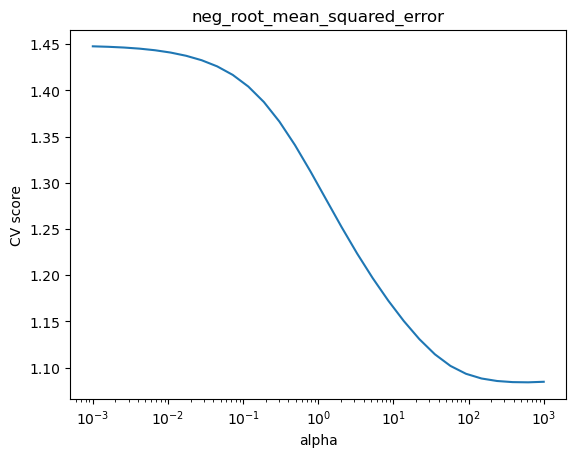

In [134]:
best_alpha = search_best_alpha('neg_root_mean_squared_error', X_train_train, y_train_train)
metrics(X_train_train, y_train_train, X_test, y_test, best_alpha)

Best a for neg_mean_absolute_error is, 92.36708571873865
RMSE: 0.9874497298692209
MAE: 0.553900058715914
R^2: 0.031089274130527866


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


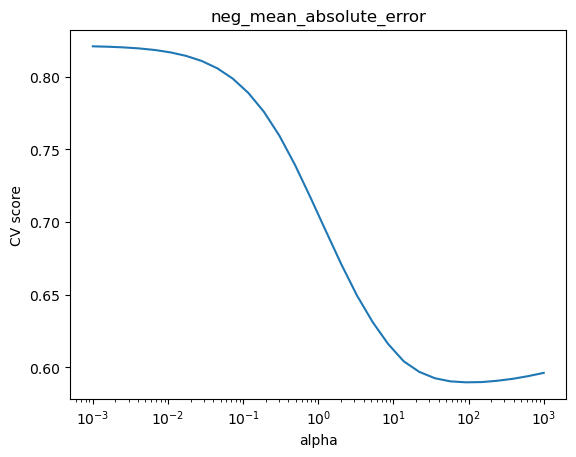

In [136]:
best_alpha = search_best_alpha('neg_mean_absolute_error', X_train_train, y_train_train)
metrics(X_train_train, y_train_train, X_test, y_test, best_alpha)

Best a for r2 is, 621.0169418915616
RMSE: 0.9897652063589439
MAE: 0.5630789087256522
R^2: 0.02653993794724896


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


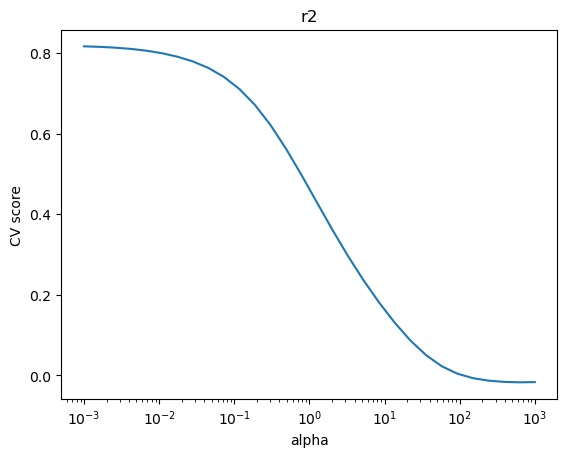

In [142]:
best_alpha = search_best_alpha('r2', X_train_train, y_train_train)
metrics(X_train_train, y_train_train, X_test, y_test, best_alpha)

**14.** Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

Text(0.5, 1.0, 'Error histogram')

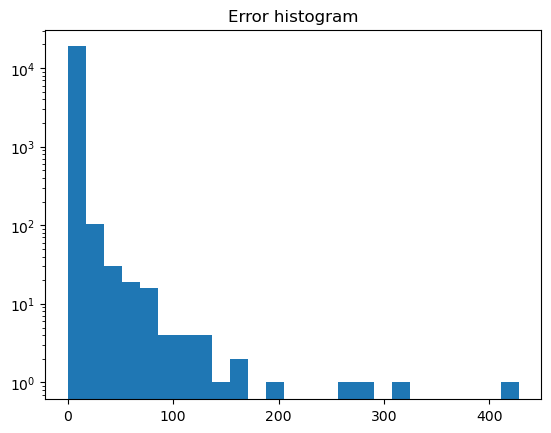

In [140]:
model = Ridge()
y_pred = cross_val_predict(model, X_test, y_test)
error = (y_pred - y_test) ** 2
plt.hist(error, bins = 25)
plt.yscale("log")
plt.title("Error histogram")